In [1]:
!pip install tensorflow-gpu 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.6 kB/s 
     |████████████████████████████████| 1.6 MB 29.1 MB/s 
     |████████████████████████████████| 438 kB 37.9 MB/s 
     |████████████████████████████████| 5.8 MB 59.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [2]:
import tensorflow as tf
print(tf.__version__)


2.9.1


In [3]:
#importing some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Dividing data into independent and dependent features
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
## Feature Engineering
##We are using one hot encoding so the other categories can be found easily 
##drop_first is used to drop one so the rest is self explanatory
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)


In [10]:
## concatinate the above variables with the dataframe we need to drop the existing category
x=x.drop(['Geography','Gender'],axis=1)

In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
## concatinate the above variables with the dataframe
x=pd.concat([x,geography,gender],axis=1)


In [13]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
#feature scaling 
## Why standardscaler? minmax scaler is for CNN ,Standardscaler is based on Z score if data varies from mean to standard deviation then we use standard scaler
##We use fit_transform() on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data.
## We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data.

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
x_train.shape

(8000, 11)

In [18]:
##Lets create a ANN
##
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
##Initialization of ANN
classifier= Sequential()

In [20]:
## Adding the input layer
## Number of inputs can be observed from the shape of x_train that is 11
##Dense to add layers
classifier.add(Dense(units=11,activation='relu'))


In [21]:
##Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))


In [22]:
##Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [23]:
##Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [24]:
## Training of nueral newtwork
##by default adam optimizer has learning rate
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [25]:
##Specifying a specific learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [29]:
##Early stopping it used to stop the model the when there is no much is change in accuracy
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [30]:
##Training of nueral newtwork
##Since the epoch value is high accuracy will be same at some point this leads to what should be the number of epochs?
##Validation split is we are taking that data to split for training
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4164 - accuracy: 0.7962 - val_loss: 0.4260 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4061 - accuracy: 0.7962 - val_loss: 0.4156 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3941 - accuracy: 0.8128 - val_loss: 0.4059 - val_accuracy: 0.8160
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3842 - accuracy: 0.8350 - val_loss: 0.3970 - val_accuracy: 0.8277
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3761 - accuracy: 0.8380 - val_loss: 0.3898 - val_accuracy: 0.8383
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3701 - accuracy: 0.8446 - val_loss: 0.3862 - val_accuracy: 0.8425
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3652 - accuracy: 0.8472 - val_loss: 0.3821 - val_accuracy:

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

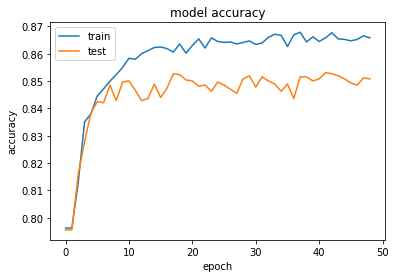

In [33]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

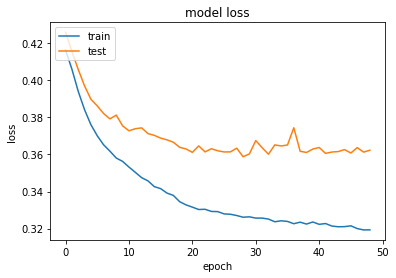

In [34]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [35]:
##Prediction for test data
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [38]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1509,   86],
       [ 196,  209]])

In [40]:
## calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.859

In [41]:
## get the weights
classifier.get_weights()

[array([[ 0.04071629, -0.01143646, -0.49887574, -0.0867672 , -0.0212751 ,
          0.12884478, -0.02578767, -0.1686841 ,  0.27544236,  0.4979822 ,
         -0.11678081],
        [ 0.7600326 ,  0.18596627,  0.534395  ,  0.13447748, -0.6360137 ,
          0.02366308, -0.47746795,  0.30690953, -0.04467614,  0.4726155 ,
         -0.38176134],
        [ 0.36763066, -0.05714475, -0.6095691 , -0.10583057, -0.21593547,
         -0.12321317,  0.08450757, -0.23397274,  0.14638929,  0.15182017,
         -0.03676384],
        [ 0.10172327, -0.27324814, -0.15473177, -0.41580033,  0.22574124,
          0.33848974, -0.11631166,  0.2873509 ,  0.2822488 , -0.45867413,
         -0.10814789],
        [-0.23591752, -1.1881071 , -0.27210587, -0.00355283,  0.12858054,
          1.0869826 ,  0.16676393,  0.6042515 , -0.36331293,  0.01794622,
          0.15565667],
        [ 0.1743464 ,  0.05456121, -0.1498837 , -0.0077319 ,  0.10057294,
          0.00409653,  0.26682773, -0.11459619, -0.08684023,  0.0455803